In [11]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

import random
import itertools
import colorsys
import numpy as np
from skimage.measure import find_contours
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

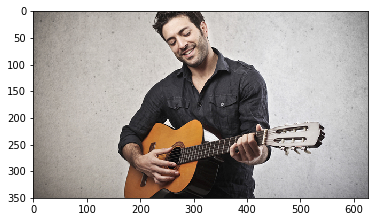

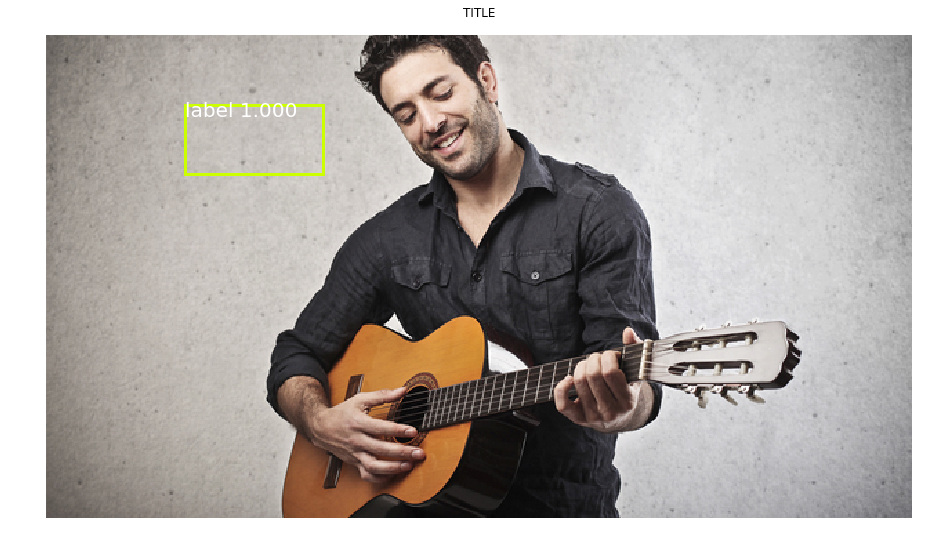

In [45]:
image = imread('test_img.jpg')
plt.imshow(img)
plt.show()

ax=None
if not ax:
    _, ax = plt.subplots(1, figsize=(16, 16))


boxes = (50, 100, 100, 200)
color = (0.7999999999999998, 1.0, 0.0)
height, width = image.shape[:2]
ax.set_ylim(height + 10, -10)
ax.set_xlim(-10, width + 10)
ax.axis('off')
ax.set_title('TITLE')


output_image = image.astype(np.uint32).copy()

## Bounding box
y1, x1, y2, x2 = boxes
p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=3,
                              alpha=1, linestyle="solid",
                              edgecolor=color, facecolor='none')
ax.add_patch(p)

# Label
class_id = 'class_id'
score = 1.000
label = 'label'
caption = "{} {:.3f}".format(label, score) if score else label
ax.text(x1, y1 + 8, caption,
                color='w', size=20, backgroundcolor="none")

ax.imshow(output_image.astype(np.uint8))
plt.show()

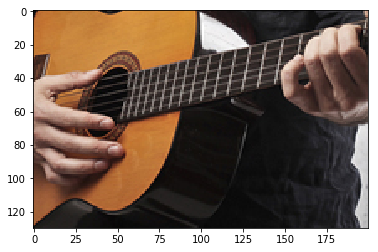

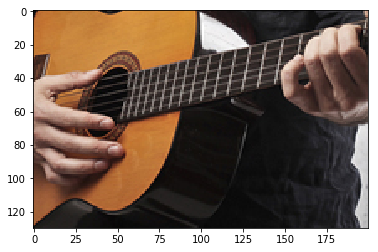

In [43]:
def crop(image, y, x, h, w):
    return image[y:y+h , x:x+w, :]

image = imread('test_img.jpg')
new_image = crop(image, 220, 220, 200, 200)
plt.imshow(new_image)
plt.show()   

plt.imsave('test_r.png', new_image)

In [59]:
#info = "image_id:test_img,caption:This is test,the number of regions:3,r1:t1|1 2 3 4,r2:t2|10 20 30 40,r3:t3|100 200 300 400,weight:1 2 3 4 5 6\n"
info = "image_id:test_img,caption:This is test,the number of regions:1,r1:t1|0 0 100 200,weight:1 2 3 4 5 6\n"


with open("info.txt", "a") as sd:
    sd.write(info)

print(info.split(','))

['image_id:test_img', 'caption:This is test', 'the number of regions:1', 'r1:t1|0 0 100 200', 'weight:1 2 3 4 5 6\n']


In [81]:
with open("info.txt", "r") as sd:
    line = sd.read()
    print(line)
    
attr = line.split(',')
image_id = attr[0].split(':')[1]
caption_pred = attr[1].split(':')[1]
caption_GT = attr[2].split(':')[1]
numRegion = attr[3].split(':')[1]
regions_label = []
regions_coord = []
for i in range(int(numRegion)):
    region_i_infor = attr[i+4].split(':')[1]
    regions_label.append(region_i_infor.split('|')[0])
    regions_coord.append(region_i_infor.split('|')[1])

    
    
idx = 4 + int(numRegion)
weight = attr[idx].split(':')[1]
print(image_id, caption_pred, caption_GT, numRegion, weight)

for i in range(int(numRegion)):
    print(regions_label[i], regions_coord[i])
                            


image_id:test_img,caption_pred:This is test,caption_GT:This is GT,the number of regions:2,r1:t1|0 0 100 200,r2:t2|50 70 160 120,weight:1 2 3 4 5 6

test_img This is test This is GT 2 1 2 3 4 5 6

t1 0 0 100 200
t2 50 70 160 120


In [68]:
a = 10
for i in range(a+2):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
